# Исследование надёжности заёмщиков

 **Цель исследования -** проверить гипотезу о том, что семейное положение и количество детей клиента влияет на факт погашения кредита в срок. 

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Данные о платежеспособности клиентов хранятся в файле `data.csv`. Перед проверкой гипотезы проведен обзор данных, проверка на ошибки и оценка их влияния на исследование. Критичные ошибки исправлены.
 
Таким образом, исследование пройдено в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотезы.



## Обзор данных


In [1]:
import pandas as pd # импорт библиотеки pandas
from io import BytesIO
import requests

In [2]:
try:
    df = pd.read_csv('./datasets/data.csv') # чтение файла с данными и сохранение в df

except FileNotFoundError:
    spreadsheet_id = '1NO_YW_XRLXFZdg50DQ-x4MLjwBem4Aax'
    file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=xlsx'.format(spreadsheet_id)
    r = requests.get(file_name)
    df = pd.read_excel(BytesIO(r.content))
    


In [3]:
df # сделаем обзор таблицы df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


Найдем разброс значений по столбцам, минимальные, максимальные значения, среднюю и медиану по каждому столбцу.

In [4]:
df.describe() # найдем разброс значений по столбцам

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


Получим общую информацию о таблице:


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Итак, в таблице двенадцать столбцов. Столбцы содержат типы данных — `object`, `int`, `float`.

Наименования столбцов оформлены в соответствии с хорошим стилем.

Согласно документации к данным:

* `children` — количество детей в семье;
* `days_employed` — общий трудовой стаж в днях;  
* `dob_years` — возраст клиента в годах;
* `education` — уровень образования клиента;
* `education_id` — идентификатор уровня образования клиента;
* `family_status` — семейное положение;
* `family_status_id` — идентификатор семейного положения;
* `gender` — пол клиента;
* `income_type` — тип занятости;
* `debt` — имел ли задолженность по возврату кредита;
* `total_income` — ежемесячный доход;
* `purpose` — цель получения кредита.


Количество значений в столбцах различается. Значит, в данных есть пропущенные значения. Проверим это в исследовании, проведенном ниже.


**Выводы**

В каждой строке таблицы — данные о клиентах, воспользовавшихся кредитными средствами на различные цели за определенный промежуток времени. Часть колонок содержит категориальные значения, которые описывают клиента, такие как: уровень образования, семейное положение, принадлежность половому признаку, тип занятости, имел ли клиент задолженность по возврату кредита и цель его получения. Остальные данные содержат количественные значения: количество детей в семье, общий трудовой стаж в днях, возраст клиента в годах, его ежемесячный доход. 

Предварительно можно утверждать, что, данных достаточно для ответов на поставленные вопросы. Но встречаются пропуски в данных, а так же аномальные значения, явные и неявные дубликаты. При дальнейшем анализе без устранения проблем в данных, результаты исследования будут искажены.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных
Проверим и исключим пропуски. Затем данные проверим на дубликаты.

### Пропуски значений
Посчитаем количество пропущенных значений в таблице:

In [6]:
df.isna().sum() # подсчёт пропусков

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [7]:
df[df['days_employed'].isna()].head() # вывод первых 5-ти строк с пропущенными значениями столбца 'days_employed'

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


В столбцах `days_employed` и `total_income` имеются пропущенные значения типа NaN (специальное значение типа float, которое используется если результат вычисления не может быть представлен как конкретное число, либо неизвестен). 

Пропуски в данных появляются разными путями. Например, пользователь не указал о себе какие-нибудь сведения, или автоматизированная система сбора информации дала сбой. Иногда пропуски оставляют умышленно, рассчитывая на автозаполнение спецсимволами.
На практике было бы правильно установить причину пропусков и восстановить данные. Такой возможности нет, поэтому действия следующие.

*Общий трудовой стаж* и *среднемесячный доход* — количественные переменные. Пропуски в таких переменных заполняют характерными значениями, характеризующими состояние выборки. Чтобы примерно оценить типичные значения выборки, можно использовать среднее арифметическое значение или медиану.
Среднее значение некорректно характеризует данные, когда некоторые значения сильно выделяются среди большинства, поэтому разумнее заменять пропуски медианными значениями.

* оценим, какую долю составляют пропущенные значения в каждом из столбцов с пропусками;.
* заполним пропуски медианными значениями.


In [8]:
pass_days_employed = len(df[df['days_employed'].isna()])/len(df['days_employed']) # Найдем долю пропущенных значений
                                                                                     # в столбце 'days_employed' 

In [9]:
pass_total_income = len(df[df['total_income'].isna()])/len(df['total_income']) # Найдем долю пропущенных значений
                                                                                  # в столбце 'days_employed' 

In [10]:
print(f'Доля пропущеных значений в столбце days_employed {pass_days_employed:.1%}')
print(f'Доля пропущеных значений в столбце total_income {pass_total_income:.1%}')# Выведем на экран долю пропусков в процентах

Доля пропущеных значений в столбце days_employed 10.1%
Доля пропущеных значений в столбце total_income 10.1%


In [11]:
df.isna().mean()

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

Найдем среднее арифметическое и медианное значение для столбца `days_employed`, чтобы оценить их разницу.

Ниже мы увидим, что медиана принимает отрицательное значение. Это произошло из-за присутствия артефактов - отрицательных значений в указанном столбце, что существенно исказило данные. Эта ошибка с большой вероятностью имеет техническое происхождение, поэтому мы заменим отрицательные значения на положительные применив функцию нахождения модуля.

In [12]:
df['days_employed'].mean() # отобразим среднее арифметическое значение

63046.497661473615

In [13]:
df['days_employed'].median() # отобразим медианное значениеdf['days_employed']

-1203.369528770489

In [14]:
df['days_employed'] = df['days_employed'].abs() # заменим отрицательные значения в столбце на положительные

In [15]:
#days_employed_median = df['days_employed'].median() # запишем медианное значение в переменную 

In [16]:
#df['days_employed'] = df['days_employed'].fillna(days_employed_median) # заменим пропущенные значения на медианное

In [17]:
df['days_employed'] = df['days_employed'].fillna(df.groupby('income_type')['days_employed'].transform("median"))

Проделаем то же самое для столбца `total_income`. Найдем медианное значение, и заменим им все пропуски.

In [18]:
#total_income_median = df['total_income'].median() # запишем медианное значение в переменную

In [19]:
#total_income_median # выведем значение на экран

In [20]:
#df['total_income'] = df['total_income'].fillna(total_income_median) # заменим пропущенные значения на медианное

In [21]:
df['total_income'] = df['total_income'].fillna(df.groupby('income_type')['total_income'].transform("median"))

In [22]:
df.isna().sum() # сделаем подсчет пропусков повторно

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Таким образом мы избавились от пропусков.

### Изменение типов данных

В столбце `total_income` мы заменим вещественный тип данных на целочисленный и отобразим информацию, для того, чтобы оценить произошла ли замена.

In [23]:
df['total_income'] = df['total_income'].astype('int')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  int32  
 11  purpose           21525 non-null  object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 1.9+ MB


### Дубликаты

**Проверка данных на аномалии и исправления**

Посчитаем явные дубликаты в таблице:

In [25]:
df.duplicated().sum() # подсчёт явных дубликатов

54

Удалим явные дубликаты, и произведем проверку на их отсутствие:

In [26]:
df = df.drop_duplicates().reset_index(drop=True) # удаление явных дубликатов (с удалением старых индексов и формированием новых)

In [27]:
df.duplicated().sum() # проверка на отсутствие дубликатов

0

Теперь необходимо оценить имеются ли в таблице неявные дубликаты.
Выведем на экран список уникальных значений всех столбцов, кроме тех, что содержат в себе количественные переменные. Оценим содержание столбцов и избавимся от неявных дубликатов. Для этого применим функцию, которая пройдет по всем столбцам датасета и выведен на экран все уникальные значения каждого из них. 

In [28]:
pd.set_option('max_colwidth', 400) # установим максимальную ширину столбца на выходном дисплее, чтобы оценить вывод ниже

In [29]:
#def unique(row):
#    return row.sort_values().unique()

In [30]:
#df.drop(['days_employed','total_income'], axis=1).apply(unique) # исключим значения столбцов с количественными переменными

In [31]:
df['children'].sort_values().unique()

array([-1,  0,  1,  2,  3,  4,  5, 20], dtype=int64)

In [32]:
df['dob_years'].sort_values().unique()

array([ 0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75], dtype=int64)

In [33]:
df['education'].sort_values().unique()

array(['ВЫСШЕЕ', 'Высшее', 'НАЧАЛЬНОЕ', 'НЕОКОНЧЕННОЕ ВЫСШЕЕ',
       'Начальное', 'Неоконченное высшее', 'СРЕДНЕЕ', 'Среднее',
       'УЧЕНАЯ СТЕПЕНЬ', 'Ученая степень', 'высшее', 'начальное',
       'неоконченное высшее', 'среднее', 'ученая степень'], dtype=object)

In [34]:
df['education_id'].sort_values().unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [35]:
df['family_status'].sort_values().unique()

array(['Не женат / не замужем', 'в разводе', 'вдовец / вдова',
       'гражданский брак', 'женат / замужем'], dtype=object)

In [36]:
df['family_status_id'].sort_values().unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [37]:
df['gender'].sort_values().unique()

array(['F', 'M', 'XNA'], dtype=object)

In [38]:
df['income_type'].sort_values().unique()

array(['безработный', 'в декрете', 'госслужащий', 'компаньон',
       'пенсионер', 'предприниматель', 'сотрудник', 'студент'],
      dtype=object)

In [39]:
df['debt'].sort_values().unique()

array([0, 1], dtype=int64)

In [40]:
df['purpose'].sort_values().unique()

array(['автомобили', 'автомобиль', 'высшее образование',
       'дополнительное образование', 'жилье',
       'заняться высшим образованием', 'заняться образованием',
       'на покупку автомобиля', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля', 'на проведение свадьбы',
       'недвижимость', 'образование', 'операции с жильем',
       'операции с коммерческой недвижимостью',
       'операции с недвижимостью', 'операции со своей недвижимостью',
       'покупка жилой недвижимости', 'покупка жилья',
       'покупка жилья для сдачи', 'покупка жилья для семьи',
       'покупка коммерческой недвижимости', 'покупка недвижимости',
       'покупка своего жилья', 'получение высшего образования',
       'получение дополнительного образования', 'получение образования',
       'приобретение автомобиля', 'профильное образование',
       'ремонт жилью', 'свадьба', 'свой автомобиль',
       'сделка с автомобилем', 'сделка с подержанным автомобилем',
       'строительство 

**Оценив результаты функции можно сделать вывод:**
* в графе `children` находятся артефакты: очевидно, что отрицательного значения в графе быть не может, так же значение '20' скорее случайность, заменим его на значение '2';
* в столбце `dob_years` имеется значение 0, чего быть не может. Найдем строку датасета, посмотрим на характеристики клиента, и сделаем вывод, что можно сделать с данной аномалией;
* в столбце `education`, в значениях использованы строчные и прописные буквы;
* в столбце `gender` имеется значение XNA - пол данного клиента определить невозможно, важно оценить количество таких клиентов;
* в графе `purpose` имеется множество неявных дубликатов.

In [41]:
df['education'] = df['education'].str.lower() # приведем все значения к единому регистру, выявлены неявные дубликаты

In [42]:
df['children'] = df['children'].abs() # заменим отрицательные значения в столбце 'children' на положительные

In [43]:
df['children'].value_counts() # оценим количество клиентов с аномальным значением в графе количество детей

0     14107
1      4856
2      2052
3       330
20       76
4        41
5         9
Name: children, dtype: int64

Заменим значение  '20' на '2' в столбце `children` и оценим результат замены.

In [44]:
df.loc[df['children'] == 20, 'children'] = 2 # заменим значение '20' на '2'

In [45]:
df['children'].value_counts() # оценим изменения

0    14107
1     4856
2     2128
3      330
4       41
5        9
Name: children, dtype: int64

Найдем количество клиентов с аномальным значением в столбце `dob_years`, найдем долю клиентов с ошибкой в возрасте. Выведем часть датафрейма с данными о клиентах со значением в столбце возраст равным 0.

In [46]:
dob_years_0 = df[df['dob_years'] == 0].count()['dob_years'] # найдем количество клиентов с аномальным значением
                                                            # в столбце dob_years

In [47]:
dob_years_count = df['dob_years'].count() # посчитаем общее число клиентов

In [48]:
f'Доля клиентов с некорректно указанным возрастом равна {dob_years_0/dob_years_count:.1%}'

'Доля клиентов с некорректно указанным возрастом равна 0.5%'

In [49]:
df[df['dob_years'] == 0].head() # выведем строки датафрейма, где возраст клиента равен 0, оценим параметры клиентов

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,346541.618895,0,среднее,1,женат / замужем,0,F,пенсионер,0,71291,автомобиль
149,0,2664.273168,0,среднее,1,в разводе,3,F,сотрудник,0,70176,операции с жильем
270,3,1872.663186,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166,ремонт жилью
578,0,397856.565013,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620,строительство собственной недвижимости
1040,0,1158.029561,0,высшее,0,в разводе,3,F,компаньон,0,303994,свой автомобиль


Оценив долю клиентов с указанием в столбце `dob_years` значений равных 0, а так же изучив параметры этих клиентов можно сделать вывод, что данные ошибки носят случайный характер, и возникли по причине человеческого фактора. Так как доля таких клиентов составляет всего о,5%, и данные ошибки не повлияют на ход и результаты данного исследования, цесообразно оставить значения без изменения.

Исследуем уникальные значения в столбце `gender`, что может дать нам представление о допущеных ошибках. Мы выявили клиента, пол которого не определен. Оставим данное значение так же без изменения.

In [50]:
df[df['gender'] == 'XNA'].count()['gender'] # посчитаем количество клиентов с аномальным значением пола клиента

1

Рассмотрим уникальные значения только столбца `purpose`.

In [51]:
df['purpose'].sort_values().unique() # посмотрим уникальные значения только столбца цели получения кредита

array(['автомобили', 'автомобиль', 'высшее образование',
       'дополнительное образование', 'жилье',
       'заняться высшим образованием', 'заняться образованием',
       'на покупку автомобиля', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля', 'на проведение свадьбы',
       'недвижимость', 'образование', 'операции с жильем',
       'операции с коммерческой недвижимостью',
       'операции с недвижимостью', 'операции со своей недвижимостью',
       'покупка жилой недвижимости', 'покупка жилья',
       'покупка жилья для сдачи', 'покупка жилья для семьи',
       'покупка коммерческой недвижимости', 'покупка недвижимости',
       'покупка своего жилья', 'получение высшего образования',
       'получение дополнительного образования', 'получение образования',
       'приобретение автомобиля', 'профильное образование',
       'ремонт жилью', 'свадьба', 'свой автомобиль',
       'сделка с автомобилем', 'сделка с подержанным автомобилем',
       'строительство 

Посмотрев на список мы нашли неявные дубликаты, все значения можно разделить на категории исходя из цели получения кредита.

Основные направления:
* *покупка автомобиля*,
* *получение образования*,
* *приобретение недвижимости*,
* *иные нужды*.

Чтобы включить значение в опредененную группу, напишем функцию `purpose_groups()` с двумя параметрами: 
* `purpose_initial` — список дубликатов,
* `correct_purpose` — строка с присвоенным значением.

Функция должна исправить колонку `purpose_group` в таблице `df`: заменить каждое значение из списка `purpose_initial` на значение из `correct_purpose`.

Изменения будем вносить в столбец `purpose_group`, который получили путем копирования столбца `purpose`, чтобы сохранить в таблице исходные данные.

In [52]:
df['purpose_group'] = df['purpose'] # создадим столбец, для разделения целей получения кредита на направления

In [53]:
def purpose_groups(purpose_initial,correct_purpose):     # Функция для замены неявных дубликатов
    for initial in range(len(purpose_initial)):
        df['purpose_group'] = df['purpose_group'].replace(purpose_initial[initial], correct_purpose[initial])
duplicates = [['автомобили',
              'автомобиль', 
              'на покупку автомобиля',
              'на покупку подержанного автомобиля',
              'на покупку своего автомобиля',
              'приобретение автомобиля',
              'свой автомобиль',
              'сделка с автомобилем',
              'сделка с подержанным автомобилем'],
              ['высшее образование',
               'дополнительное образование',
               'заняться высшим образованием',
               'заняться образованием',
               'образование',
               'получение высшего образования',
               'получение дополнительного образования',
               'профильное образование'],
              ['жилье',
               'недвижимость',
               'операции с жильем',
               'операции с коммерческой недвижимостью',
               'операции с недвижимостью',
               'операции со своей недвижимостью',
               'покупка жилой недвижимости',
               'покупка жилья',
               'покупка жилья для сдачи',
               'покупка жилья для семьи',
               'покупка коммерческой недвижимости',
               'покупка недвижимости',
               'покупка своего жилья',
               'строительство жилой недвижимости',
               'строительство недвижимости',
               'строительство собственной недвижимости'],
              ['на проведение свадьбы',
               'ремонт жилью',
               'свадьба',
               'сыграть свадьбу']
             ]
purpose = ['покупка автомобиля',
           'получение образования',
           'приобретение недвижимости',
           'иные нужды'
          ] 

In [54]:
purpose_groups(duplicates, purpose)

**Вывод** 

Оценив долю клиентов с указанием в столбце `dob_years` значений равных 0, а так же изучив параметры этих клиентов можно сделать вывод, что данные ошибки носят случайный характер, и возникли по причине человеческого фактора. Так как доля таких клиентов составляет всего о,5%, а так же по причине того, что данные ошибки не повлияют на ход и результаты исследования, цесообразно оставить значения без изменения. 

То же можно сказать об артефакте в столбце `gender`, в нем имеется значение XNA. Пол клиента не определен, оставим его так же без изменения. 

Столбец `purpose` содержит в себе неявные дубликаты, которые можно объединить в группы.

Мы внесли изменения в столбцы `children` и `education`, оценим изменения - выведем уникальные значения столбцов на экран.

In [55]:
#def unique(row):
#    return row.sort_values().unique()

In [56]:
#df.drop(['days_employed','total_income'], axis=1).apply(unique) # проверим изменения, выведем на экран уникальные знаачения столбцов

In [57]:
df['children'].sort_values().unique() # просмотрим уникальные значения только тех столбцов, в которые внесли изменения,
                                      # чтобы их оценить

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [58]:
df['education'].sort_values().unique()

array(['высшее', 'начальное', 'неоконченное высшее', 'среднее',
       'ученая степень'], dtype=object)

In [59]:
df['purpose_group'].sort_values().unique()

array(['иные нужды', 'покупка автомобиля', 'получение образования',
       'приобретение недвижимости'], dtype=object)

<AxesSubplot:>

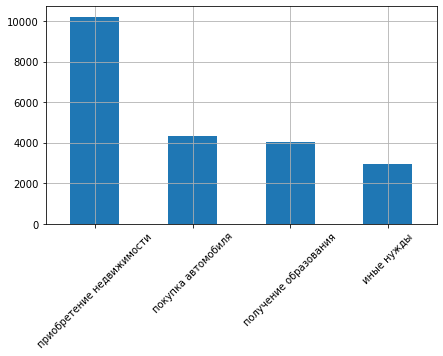

In [60]:
df['purpose_group'].value_counts().plot.bar(grid=True,ylim=0,rot=45,figsize=(7,4))

### Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма

Информация об уровне образования и семейном положении клиента хранятся в виде строк, такой способ хранения приводит к тому, что:
* Усложняется визуальная работа с таблицей.
* Увеличивается размер файла и время обработки данных.
* Чтобы отфильтровать данные по типу обращения, приходится набирать его полное название. А в нём можно ошибиться.
* Создание новых категорий и изменение старых отнимает много времени.
Предупредить появление этих проблем можно с помощью отдельного «словаря», где названию категории будет соответствовать номер. И в будущих таблицах можно обращаться уже не к длинной строке, а к её числовому обозначению.

Создадим два новых датафрейма со столбцами:
* education_id и education — в первом;
* family_status_id и family_status — во втором.


In [61]:
df_education_id = df[['education_id','education']] # создадим таблицу словарь для education_id

In [62]:
df_family_status_id = df[['family_status_id','family_status']] # создадим таблицу словарь для family_status_id

In [63]:
df_education_id = df_education_id.drop_duplicates().reset_index(drop=True) # удалим дубликаты

In [64]:
df_family_status_id = df_family_status_id.drop_duplicates().reset_index(drop=True) # удалим дубликаты

In [65]:
df_education_id # выведем на экран

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


In [66]:
df_family_status_id # выведем на экран

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


Удалим из исходного датафрейма столбцы `education` и `family_status`, оставив только их идентификаторы: education_id и family_status_id.

In [67]:
df = df.drop(['education','family_status'], axis=1)

In [68]:
df.columns # проверим результат изменений

Index(['children', 'days_employed', 'dob_years', 'education_id',
       'family_status_id', 'gender', 'income_type', 'debt', 'total_income',
       'purpose', 'purpose_group'],
      dtype='object')

На основании диапазонов, указанных ниже, создадим столбец total_income_category с категориями:
* 0–30000 — 'E';
* 30001–50000 — 'D';
* 50001–200000 — 'C';
* 200001–1000000 — 'B';
* 1000001 и выше — 'A'


In [69]:
def total_income_group(x):
    if x <= 30000:
        return 'E'
    if x <= 50000:
        return 'D'
    if x <= 200000:
        return 'C'
    if x <= 1000000:
        return 'B'
    return 'A'


In [70]:
df['total_income_category'] = df['total_income'].apply(total_income_group) # применим к каждому значению в столбце нашу функцию
                                                                           # запишем в новый столбец

In [71]:
df # посмотрим на обновленный датафрейм

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,purpose_group,total_income_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,приобретение недвижимости,B
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,покупка автомобиля,C
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,приобретение недвижимости,C
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,получение образования,B
4,0,340266.072047,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,иные нужды,C
...,...,...,...,...,...,...,...,...,...,...,...,...
21466,1,4529.316663,43,1,1,F,компаньон,0,224791,операции с жильем,приобретение недвижимости,B
21467,0,343937.404131,67,1,0,F,пенсионер,0,155999,сделка с автомобилем,покупка автомобиля,C
21468,1,2113.346888,38,1,1,M,сотрудник,1,89672,недвижимость,приобретение недвижимости,C
21469,3,3112.481705,38,1,0,M,сотрудник,1,244093,на покупку своего автомобиля,покупка автомобиля,B


# Вопросы

Необходимо ответить на вопросы:
* Есть ли зависимость между количеством детей и возвратом кредита в срок?
* Есть ли зависимость между семейным положением и возвратом кредита в срок?
* Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
* Как разные цели кредита влияют на его возврат в срок?


In [72]:
debt_share = df['debt'].mean()

In [73]:
print(f'Доля должников составляет всего {debt_share:.1%}')

Доля должников составляет всего 8.1%


Оценим их общее количество.

In [74]:
df[df['debt'] == 1]['debt'].value_counts() # оценим общее количество должников

1    1741
Name: debt, dtype: int64

Сгруппируем датафрейм по графе дети, и факт возврата кредита, к значениям применим функции для расчета количества клиентов в каждой группе, количество должников по группам, и доля должников в общем количестве. Визуализируем результат функции.

In [75]:
df.groupby('children')['debt'].agg(['count','mean','sum'])

,count,mean,sum
children,,,
0,14107,0.075353,1063
1,4856,0.091639,445
2,2128,0.094925,202
3,330,0.081818,27
4,41,0.097561,4
5,9,0.000000,0


<AxesSubplot:xlabel='children'>

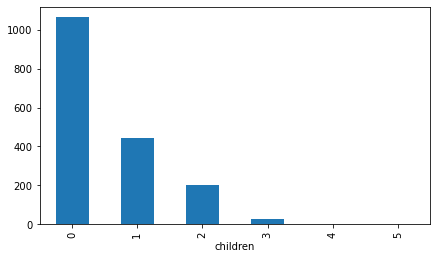

In [76]:
df.groupby('children')['debt'].sum().plot.bar(figsize=(7,4)) # исследуем динамику, как изменяется количество должников 
                                                # в зависимости от количества детей

<AxesSubplot:xlabel='children'>

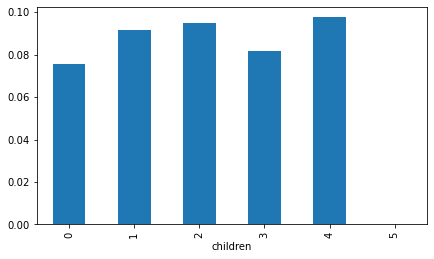

In [77]:
df.groupby('children')['debt'].mean().plot.bar(figsize=(7,4)) # рассмотрим динамику относительного показателя
                                                 # как изменяется доля должников в зависимости от количества детей

Проверив первую гипотезу, можно сделать вывод, что количество должников тем больше, чем меньше детей в семье. Но учитывая, то что сама группа клиентов без детей и с одним ребенком намного превышет по численности многодетных клиентов, целесообразнее сравнивать относительные показатели. Доли должников среди клиентов в группах, сформированных по количеству детей, меняется не значительно. Наименьший процент должников наблюдается в группе клиентов, не имеющих детей 7.5%. Наибольший процент среди клиентов, имеющих 2 детей 9.5% 

Проделаем тоже самое для групп сформированных по признаку семейное положение.

In [78]:
df.groupby('family_status_id')['debt'].agg(['count','mean','sum'])

,count,mean,sum
family_status_id,,,
0,12344,0.075421,931
1,4163,0.093202,388
2,959,0.065693,63
3,1195,0.071130,85
4,2810,0.097509,274


<AxesSubplot:xlabel='family_status_id'>

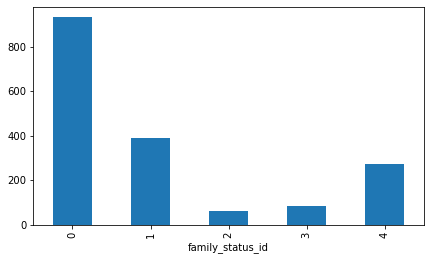

In [79]:
df.groupby('family_status_id')['debt'].sum().plot.bar(figsize=(7,4)) # исследуем динамику, как изменяется количество должников 
                                                        # в зависимости от семейного положения

<AxesSubplot:xlabel='family_status_id'>

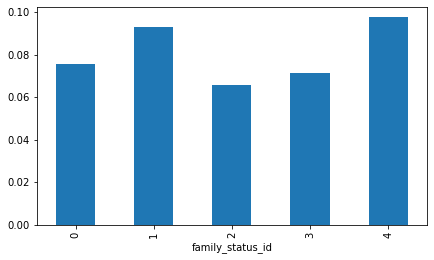

In [80]:
df.groupby('family_status_id')['debt'].mean().plot.bar(figsize=(7,4)) # рассмотрим динамику относительного показателя
                                                         # как изменяется доля должников в зависимости от семейного положения

Семейное положение имеет обозначение в виде ключа, которое мы можем увидеть в словаре. Отобразим его на экране.

In [81]:
df_family_status_id

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


Группы сформированные по семейному положению так же неоднородны по количеству, поэтому исследуем относительные показатели. Доля должников холостых клиентов и состоящих в гражданском браке превышает показатели остальных групп - 9.8% и 9.3% соответственно. Меньше всего должников в группе разведенных клиентов и со статусом вдовец/вдова - 7.1% и 6.6% соответственно.

Исследуем как зависит факт погашения кредита от уровня дохода клиента.

In [82]:
df.groupby('total_income_category')['debt'].agg(['count','mean','sum'])

,count,mean,sum
total_income_category,,,
A,25,0.080000,2
B,5042,0.070607,356
C,16032,0.084830,1360
D,350,0.060000,21
E,22,0.090909,2


Вспомним диапазоны уровня доходов для каждой категории:
* 0–30000 — 'E';
* 30001–50000 — 'D';
* 50001–200000 — 'C';
* 200001–1000000 — 'B';
* 1000001 и выше — 'A'

<AxesSubplot:xlabel='total_income_category'>

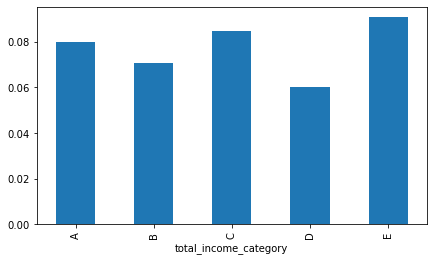

In [83]:
df.groupby('total_income_category')['debt'].mean().plot.bar(figsize=(7,4)) # рассмотрим динамику относительного показателя
                                                              # как изменяется доля должников в зависимости от уровня дохода

В группах наблюдается очень большой разброс по количеству должников. Исходя из этого, стоит сместить границы групп по уровню дохода, чтобы получить наиболее равномерное распределение, с целью минимизировать вероятность аномальных отклонений. Результаты запишем в новый столбец, чтобы сохранить данные из исходной задачи.

Сделаем следующее распределение по категориям:
* 0–50000 — 'E';
* 50001–100000 — 'D';
* 100001–150000 — 'C';
* 150001–300000 — 'B';
* 300001 и выше — 'A'

In [84]:
def total_income_group_2(x):
    if x <= 50000:
        return 'E'
    if x <= 100000:
        return 'D'
    if x <= 150000:
        return 'C'
    if x <= 300000:
        return 'B'
    return 'A'


In [85]:
df['total_income_category_2'] = df['total_income'].apply(total_income_group_2) # применим к каждому значению в столбце нашу функцию
                                                                           # запишем в новый столбец

In [86]:
df.groupby('total_income_category_2')['debt'].agg(['count','mean','sum'])

,count,mean,sum
total_income_category_2,,,
A,1483,0.071477,106
B,8350,0.078683,657
C,7175,0.086969,624
D,4091,0.080909,331
E,372,0.061828,23


<AxesSubplot:xlabel='total_income_category_2'>

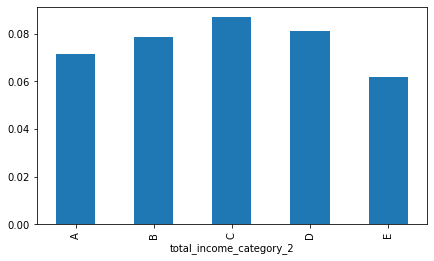

In [87]:
df.groupby('total_income_category_2')['debt'].mean().plot.bar(figsize=(7,4)) # рассмотрим динамику относительного показателя
                                                                # как изменяется доля должников в зависимости от уровня дохода

Таким образом, среди клиентов с самым высоким достатком, свыше 300 тыс.руб., меньше всего должников, что составляет 6% от общего количества клиентов в этой группе. Больше всего должников среди людей со средним достатком, с доходом 100 - 300 тыс.руб. - 8% от общего числа.

Исследуем группы клиентов по цели получения кредита.

In [88]:
df.pivot_table(index = ['purpose_group'], values = 'debt', aggfunc = ['count','mean','sum'])

,count,mean,sum
,debt,debt,debt
purpose_group,,,
иные нужды,2942,0.075119,221
покупка автомобиля,4308,0.093547,403
получение образования,4014,0.092177,370
приобретение недвижимости,10207,0.073185,747


<AxesSubplot:xlabel='purpose_group'>

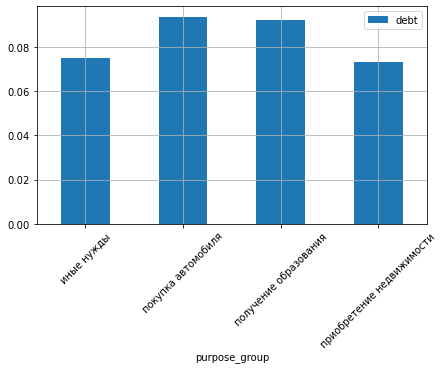

In [89]:
df.pivot_table(index = ['purpose_group'], values = 'debt', aggfunc = 'mean').plot.bar(grid=True,rot=45,figsize=(7,4))

Самая высокая доля должников среди клиентов, которые получили кредит на приоблетения автомобиля и на получение образования, показатели составляют приблизительно 9.4% и 9.2%. Меньше должников среди людей, которые обратились в банк с целью получения кредитов на покупку недвижимости и на оплату иных потредительских нужд - 7.3% и 7.5%.

## Итоги исследования

Целью проекта было выяснить, как различные факторы влияют на платежеспособность клиентов.
Были изучены показатели, которые отражают зависимость таких параметров как количество детей в семье, семейное положение, уровень дохода, а так же цели получения кредита.

1. Доли должников среди клиентов в группах, сформированных по количеству детей, меняется незначительно. Наименьший процент должников наблюдается в группе клиентов, не имеющих детей. Наибольший процент среди клиентов, имеющих 2 детей. Разница между показателями не превышает 2 п.п.

2. Доля должников холостых клиентов и состоящих в гражданском браке превышает показатели остальных групп. Меньше всего должников со статусом вдова/вдовец. Разница между максимальной и минимальной величиной исследуемых показателей не превышает 3 п.п.

3. Среди клиентов с самым высоким достатком, свыше 300 тыс.руб., меньше всего должников, что составляет 6% от общего количества клиентов в этой группе. Больше всего должников среди людей со средним достатком, с доходом 100 - 300 тыс.руб. - 8% от общего числа.

4. Самая высокая доля должников среди клиентов, которые получили кредит на приоблетения автомобиля и на получение образования. Меньше должников среди людей, которые обратились в банк с целью получения кредитов на покупку недвижимости и на оплату иных потредительских нужд. Разница между показателями не превышает 2 п.п.